Template example

In [12]:
# !sudo apt-get -y install libmagickwand-dev

In [13]:
%pip install Wand

Note: you may need to restart the kernel to use updated packages.


Edit the file /etc/ImageMagick-6/policy.xml and changed the rights for the pdf line to "read|write":

<policy domain="coder" rights="read|write" pattern="PDF" />

In [14]:
from templates.models.template import Template
from templates.services.template_service import TemplateService

In [15]:
import os
os.getcwd()

'/home/az/workspace/templates-celery/notebooks'

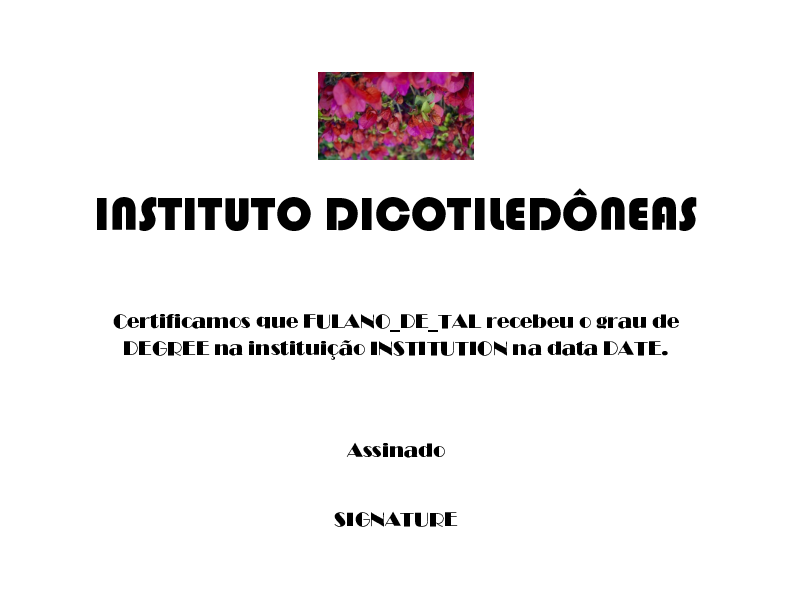

In [16]:
from wand.image import Image as WImage
from wand.color import Color
WImage(filename='../notebooks/example.pdf')

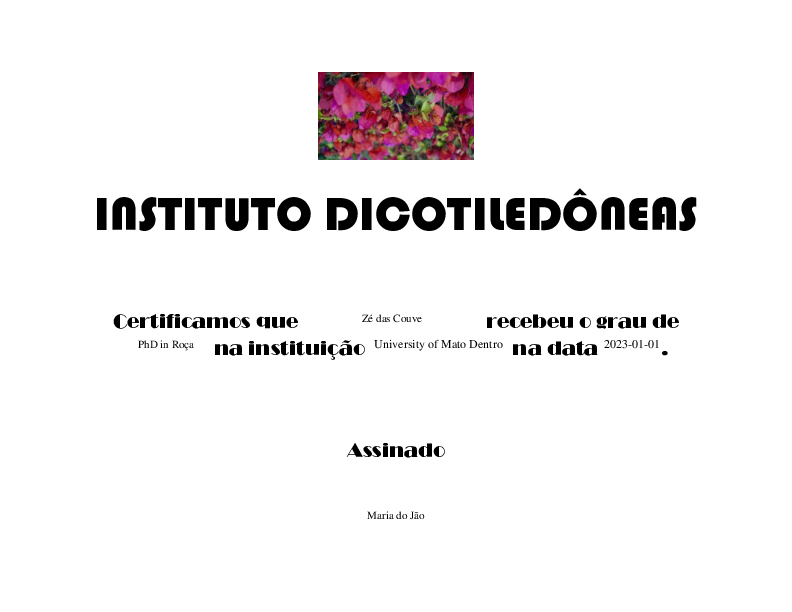

In [17]:
import base64
import tempfile

template_service = TemplateService()
template = Template(id = 1, name = "Example Template", pdf_file = base64.b64encode(open('../notebooks/example.pdf', 'rb').read()).decode())
template_service.replace_template_fields(template, 
        {
                "FULANO_DE_TAL": "Zé das Couve",
                "DEGREE": "PhD in Roça",
                "INSTITUTION": "University of Mato Dentro",
                "SIGNATURE": "Maria do Jão",
                "DATE": "2023-01-01"
        }
)
output_file = os.path.join(tempfile.gettempdir(), "output.pdf")
open(output_file, "wb").write(template.pdf_file)
WImage(filename=output_file)